In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [4]:
x,y = make_blobs(n_samples=1000, centers = 3, n_features= 2, random_state=23)


In [5]:
x.shape

(1000, 2)

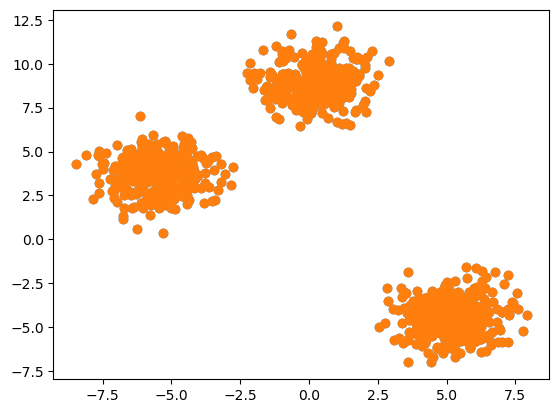

In [7]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33, random_state= 42)

In [12]:
from sklearn.cluster import KMeans


In [14]:
### Manual process - elbow method to select k value
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[34827.57682552023,
 7935.43728614542,
 1319.2730531585605,
 1186.8400070171147,
 1021.3621408069796,
 873.9060855668845,
 756.9810078533264,
 677.4463015867805,
 780.0302719002202,
 537.2242183544123]

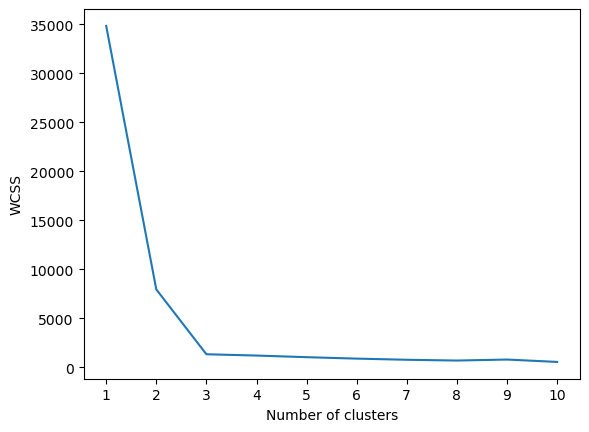

In [16]:
### plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')


In [17]:
y_labels = kmeans.fit_predict(x_train)
y_labels

array([7, 8, 1, 0, 3, 3, 1, 0, 5, 1, 2, 4, 7, 5, 4, 5, 2, 3, 2, 4, 3, 4,
       4, 0, 3, 7, 1, 0, 3, 1, 6, 6, 5, 6, 9, 9, 9, 0, 0, 5, 7, 0, 5, 1,
       0, 2, 2, 7, 6, 1, 7, 4, 7, 8, 1, 1, 5, 9, 6, 6, 7, 5, 0, 1, 2, 4,
       2, 2, 0, 8, 4, 0, 1, 4, 1, 2, 3, 0, 3, 3, 7, 1, 9, 1, 9, 4, 8, 4,
       7, 4, 8, 2, 1, 0, 5, 1, 0, 9, 2, 4, 9, 0, 9, 8, 6, 0, 4, 1, 9, 5,
       0, 9, 1, 6, 0, 0, 6, 9, 8, 4, 8, 8, 4, 3, 1, 6, 8, 4, 0, 3, 1, 6,
       3, 0, 0, 3, 0, 6, 8, 7, 4, 4, 5, 3, 4, 9, 6, 7, 4, 4, 4, 0, 4, 1,
       1, 3, 8, 9, 9, 1, 4, 0, 4, 2, 0, 0, 0, 7, 3, 6, 7, 9, 0, 3, 2, 0,
       9, 7, 4, 6, 2, 3, 7, 6, 3, 6, 2, 7, 9, 6, 1, 2, 3, 5, 7, 4, 9, 1,
       9, 4, 9, 4, 1, 0, 7, 8, 9, 0, 4, 4, 1, 6, 7, 0, 7, 3, 9, 5, 3, 2,
       0, 8, 7, 3, 6, 9, 0, 7, 9, 2, 8, 2, 6, 8, 9, 3, 7, 1, 8, 7, 2, 1,
       1, 3, 5, 4, 2, 0, 1, 6, 5, 7, 6, 0, 3, 1, 4, 4, 6, 3, 6, 2, 2, 7,
       5, 1, 9, 2, 8, 4, 6, 4, 2, 4, 2, 0, 7, 3, 2, 0, 5, 6, 3, 9, 6, 9,
       4, 0, 3, 7, 1, 5, 3, 9, 0, 4, 7, 7, 5, 1, 0,

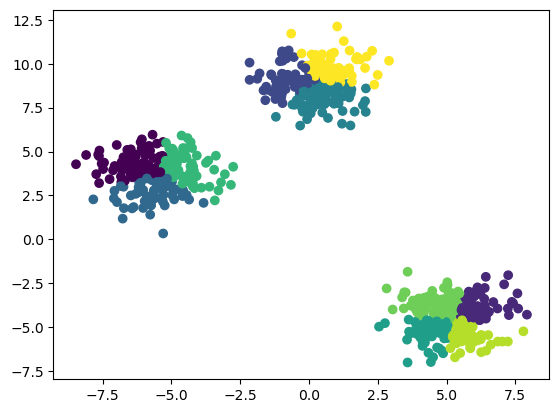

In [18]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_labels)
plt.show()

In [19]:
y_test_labels = kmeans.predict(x_test)

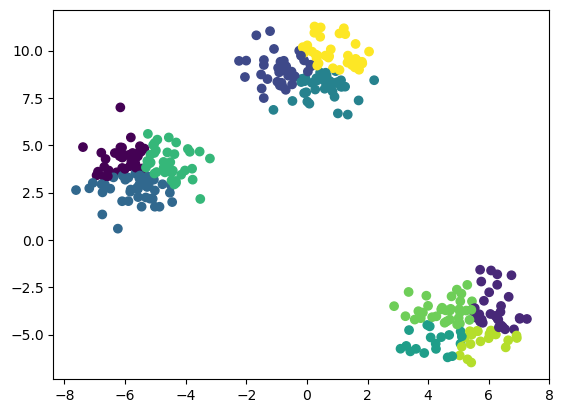

In [20]:
plt.scatter(x_test[:,0], x_test[:,1], c = y_test_labels)
plt.show()

In [21]:
# to automate the process of finding k - we use KNEE Locator
!pip install kneed

In [22]:
from kneed import KneeLocator


In [23]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing') # curve = concave / convex ; direction = increasing / decreasing

In [24]:
kl.elbow

3

In [26]:
## performance score - silhoutte score

from sklearn.metrics import silhouette_score


In [30]:
silhoutter_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters= k,init = 'k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    # silhoutter_coefficients.append(score)
    print(score)

0.7281443868598331
0.8071181203797673
0.6357733426488265
0.6561650598596553
0.3336417518574343
0.3406756773137174
0.33191968188260434
0.3446089084892948
0.3312100245151999


In [28]:
silhoutter_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.651964302413752,
 0.48140013362224976,
 0.33262208093440165,
 0.32918692917516157,
 0.3378550366488735,
 0.33270613023898626,
 0.33913862812082857]